## Checking for the GPU

In [1]:
!nvidia-smi

Tue May 23 11:52:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installing required packages

In [ ]:
!pip install pandas
!pip install numpy 
!pip install tensorflow 
!pip install matplotlib
!pip install kaggle
!pip install wget

## Importing required libraries 

In [44]:
import tensorflow as tf
import numpy as np 

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## Downloading the dataset 

In [8]:
# Setting up google drive

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# Downloading the dataset using gdown
import gdown 

url = "https://drive.google.com/uc?id=1YtcASrn6H9RzFTduNttFi2Yvyz7Ik5pc"
output = "/content/dataset.zip"

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1YtcASrn6H9RzFTduNttFi2Yvyz7Ik5pc
To: /content/dataset.zip
100%|██████████| 127k/127k [00:00<00:00, 101MB/s]


'/content/dataset.zip'

In [21]:
# Unzipping the dataset

import zipfile

with zipfile.ZipFile("/content/dataset.zip", "r") as zip_ref:
    zip_ref.extractall("/content/dataset/")


## Importing the dataset


In [25]:
import pandas as pd


# Importing the datasets
taylor_swift = pd.read_csv("/content/dataset/01-taylor_swift.csv")
fearless = pd.read_csv("/content/dataset/02-fearless_taylors_version.csv")
speak_now = pd.read_csv("/content/dataset/03-speak_now_deluxe_package.csv")
deluxe_red = pd.read_csv("/content/dataset/04-red_deluxe_edition.csv")
deluxe_1989 = pd.read_csv("/content/dataset/05-1989_deluxe.csv")
reputation = pd.read_csv("/content/dataset/06-reputation.csv")
deluxe_folklore = pd.read_csv("/content/dataset/08-folklore_deluxe_version.csv")
deluxe_evermore = pd.read_csv("/content/dataset/09-evermore_deluxe_version.csv")

# Merging the datasets

ts_lyrics_merged =  pd.concat([taylor_swift, fearless , speak_now, deluxe_red, deluxe_1989, reputation, deluxe_folklore, deluxe_evermore])

# Shuffling the dataset

ts_lyrics_merged = ts_lyrics_merged.sample(frac=1).reset_index(drop=True)

# Printing the head to check them 

ts_lyrics_merged.head()


,album_name,track_title,track_n,lyric,line
0,Speak Now (Deluxe),Enchanted,9,Wondering if you knew,48
1,evermore (deluxe version),willow,1,I'm begging for you to take my hand,38
2,Speak Now (Deluxe),Haunted,12,Something keeps me holding onto nothing,26
3,Red (Deluxe Edition),Red (Original Demo Recording),21,Easy as knowing all the words to your old favo...,16
4,evermore (deluxe version),​ivy,10,"So yeah, it's a war",54


In [27]:
ts_lyrics_merged['lyric'].head()

0                                Wondering if you knew
1                  I'm begging for you to take my hand
2              Something keeps me holding onto nothing
3    Easy as knowing all the words to your old favo...
4                                  So yeah, it's a war
Name: lyric, dtype: object

## Converting the lyrics in the cells to text file

In [29]:
ts_lyrics_list = ts_lyrics_merged['lyric'].tolist()

file_path = '/content/ts_lyrics_text.txt'

with open(file_path, 'w') as f:
    for item in ts_lyrics_list:
        f.write("%s\n" % item)


# Importing the text file and preprocessing it 

In [38]:
# Open the file
with open('/content/ts_lyrics_text.txt', 'r') as file:
    # Read the content of the file
    ts_lyrics_text = file.read()

# Convert the text to lowercase
ts_lyrics_text = ts_lyrics_text.lower()

# Split the text into sentences or words
ts_lyrics_text = ts_lyrics_text.split('\n')  # Split by line breaks


print(ts_lyrics_text)

['wondering if you knew', "i'm begging for you to take my hand", 'something keeps me holding onto nothing', 'easy as knowing all the words to your old favorite song', "so yeah, it's a war", "my reputation's never been worse, so", "that can't help but shine through", 'you and i walk a fragile line', 'you squeeze my hand three times in the back of the taxi', "dear john, i see it all now that you're gone", 'and everybody knows that, everybody knows that, ah-ah', 'but sometimes, i wonder how you think about it now', 'sensual\u2005politics', 'never impressed by me acing your tests', "joeboy 'sip (alcohol)' official lyrics & meaning | verified", 'and when i felt like i was an old cardigan', "wait there in the pourin' rain, comin' back for more", 'are we in the clear yet? are we in the clear yet?', 'windows boarded up after the storm', 'and you know you hurt him too', "and i'm comfortable", 'in a faith-forgotten land', "we fall in love 'til it hurts or bleeds", 'are we in the clear yet, in th

## Tokenizing the text file

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(ts_lyrics_text)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')


word index dictionary: {'you': 1, 'i': 2, 'the': 3, 'and': 4, 'to': 5, 'me': 6, 'it': 7, 'a': 8, 'in': 9, 'my': 10, 'oh': 11, 'your': 12, 'of': 13, 'all': 14, 'but': 15, 'that': 16, 'we': 17, "i'm": 18, 'on': 19, 'like': 20, 'know': 21, 'is': 22, 'this': 23, 'was': 24, 'be': 25, 'so': 26, 'when': 27, "don't": 28, 'never': 29, 'just': 30, 'for': 31, "it's": 32, 'now': 33, "you're": 34, 'what': 35, 'with': 36, 'time': 37, 'back': 38, 'love': 39, 'up': 40, 'out': 41, 'at': 42, 'are': 43, "'cause": 44, 'if': 45, 'no': 46, 'got': 47, 'do': 48, 'say': 49, 'think': 50, 'come': 51, 'one': 52, 'ooh': 53, 'were': 54, 'baby': 55, 'down': 56, 'see': 57, 'been': 58, 'go': 59, 'they': 60, 'could': 61, 'said': 62, "can't": 63, 'can': 64, 'there': 65, 'not': 66, 'want': 67, "i'll": 68, 'had': 69, 'have': 70, 'ever': 71, 'would': 72, 'right': 73, 'yeah': 74, 'he': 75, 'look': 76, 'wanna': 77, 'here': 78, 'way': 79, 'how': 80, 'stay': 81, 'ah': 82, 'take': 83, "that's": 84, 'about': 85, 'tell': 86, 'mad

In [41]:
import tensorflow as tf 

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in ts_lyrics_text:

	# Tokenize the current line
	token_list = tokenizer.texts_to_sequences([line])[0]

	# Loop over the line several times to generate the subphrases
	for i in range(1, len(token_list)):
		
		# Generate the subphrase
		n_gram_sequence = token_list[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [42]:
# Get sample sentence
sentence = ts_lyrics_text[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['wondering', 'if', 'you', 'knew']
[627, 45, 1, 108]


In [45]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  18 456  31]
decoded to text: ["i'm begging for"]
one-hot label: [0. 1. 0. ... 0. 0. 0.]
index of label: 1


In [46]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')


token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18 456]
decoded to text: ["i'm begging"]
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 31


## Build and compile the model

In [67]:
# Hyperparameters
embedding_dim = 64
lstm_units = 256
learning_rate = 0.001

# Build the model
model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 17, 64)            214912    
                                                                 
 bidirectional_8 (Bidirectio  (None, 512)              657408    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 3358)              1722654   
                                                                 
Total params: 2,594,974
Trainable params: 2,594,974
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [69]:
epochs = 50

# Early stopping callback 
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=5, min_delta=0.001)

# Train the model|
history = model.fit(xs, ys, epochs=100, callbacks=[early_stopping])

Epoch 1/100
1433/1433 [==============================] - 11s 8ms/step - loss: 1.0101 - accuracy: 0.7648
Epoch 2/100
1433/1433 [==============================] - 11s 8ms/step - loss: 0.9472 - accuracy: 0.7762
Epoch 3/100
1433/1433 [==============================] - 11s 8ms/step - loss: 0.9068 - accuracy: 0.7835
Epoch 4/100
1433/1433 [==============================] - 10s 7ms/step - loss: 0.8734 - accuracy: 0.7891
Epoch 5/100
1433/1433 [==============================] - 11s 7ms/step - loss: 0.8489 - accuracy: 0.7921
Epoch 6/100
1433/1433 [==============================] - 12s 8ms/step - loss: 0.8270 - accuracy: 0.7957
Epoch 7/100
1433/1433 [==============================] - 11s 8ms/step - loss: 0.8099 - accuracy: 0.7976
Epoch 8/100
1433/1433 [==============================] - 12s 8ms/step - loss: 0.7967 - accuracy: 0.7985
Epoch 9/100
1433/1433 [==============================] - 11s 8ms/step - loss: 0.7868 - accuracy: 0.8004
Epoch 10/100
1433/1433 [==============================] - 10s 7m

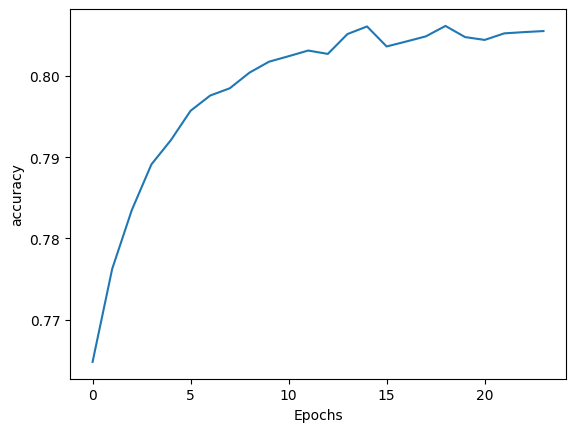

In [70]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [75]:
# Define seed text
seed_text = "Aim towards"

# Define maximum words to predict
max_words = 100

# Loop until desired length is reached or the generated text becomes nonsensical
for _ in range(max_words):
    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list, verbose=0)

    # Get the index with the highest probability
    predicted = np.argmax(probabilities, axis=-1)[0]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:
        # Look up the word associated with the index.
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

    # Check if the generated text has become nonsensical
    if "<end_token>" in seed_text:
        break

# Print the result
print(seed_text)


Aim towards in half the day just right for me at of you know it used to be here never does yeah else bad time you're lives oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh oh


## Saving the model


In [74]:
model.save("swift_language_model")